start with trip duration!

In [2]:
import pandas as pd
data = pd.read_csv('ch_taxi/taxi.csv')
data.dropna(inplace=True)

In [3]:
data.head(20)

,taxi_id,time,lon,lat,is_passenger,speed
0,22224,00:00:12,114.039169,22.565283,False,45
1,22224,00:00:27,114.040001,22.563417,False,69
2,22224,00:00:42,114.041298,22.561033,False,70
3,22224,00:00:57,114.042366,22.559084,False,69
4,22224,00:01:23,114.043114,22.556850,False,23
5,22224,00:01:27,114.042686,22.556784,False,43
6,22224,00:01:42,114.040535,22.556499,False,39
7,22224,00:01:57,114.038986,22.556316,False,45
8,22224,00:02:12,114.036903,22.556232,False,40
9,22224,00:02:27,114.035652,22.555782,False,48


In [4]:
data['time']

0          00:00:12
1          00:00:27
2          00:00:42
3          00:00:57
4          00:01:23
             ...   
9843416    23:50:28
9843417    23:51:23
9843418    23:52:18
9843419    23:52:38
9843420    23:53:33
Name: time, Length: 9843421, dtype: object

In [5]:
data['time_delta'] = data['time'].astype('string')

In [6]:
data['time_delta']

0          00:00:12
1          00:00:27
2          00:00:42
3          00:00:57
4          00:01:23
             ...   
9843416    23:50:28
9843417    23:51:23
9843418    23:52:18
9843419    23:52:38
9843420    23:53:33
Name: time_delta, Length: 9843421, dtype: string

In [ ]:
data.to_csv(r'taxi_sec.csv', index = False)

In [10]:
import pandas as pd
data = pd.read_csv('taxi_OD_dur.csv')
data.dropna(inplace=True)

In [11]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas

data.drop(data[data.Dist <= 100].index, inplace=True)
data.head(10)



,Dist
1,383
2,875
3,292
4,1011
5,1947
6,826
7,1188
8,766
9,282
10,473


In [12]:
data.drop(data[data.Dist > 5000].index, inplace=True)
x = data.iloc[:,0]
mu =np.mean(x) #计算均值
sigma =np.std(x)
mu,sigma



(827.5921938088829, 667.0995650249116)

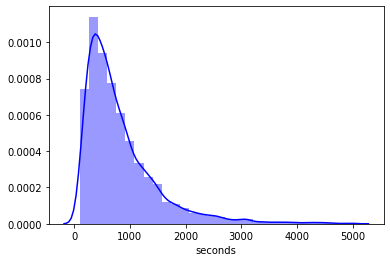

In [14]:
import seaborn as sns 

sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间
sns.distplot(x,color="b",bins=30,kde=True)
plt.xlabel('seconds')
plt.show()

In [19]:
data[data.Dist > 10000]

,Dist


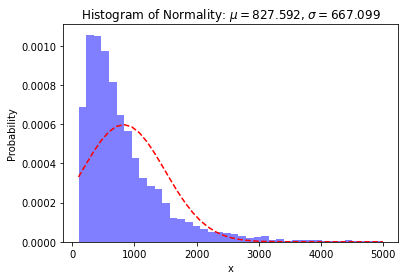

In [42]:
yhist, xhist, patches = plt.hist(x, num_bins, density = True, facecolor='blue', alpha=0.5)

# Add fitting curve
y = norm.pdf(xhist, mu, sigma)
# y = mlab.normpdf(xhist, mu, sigma)
plt.plot(xhist, y, "r--")
plt.xlabel("x")
plt.ylabel("Probability")
plt.title("Histogram of Normality: $\mu=827.592$, $\sigma=667.099$")
plt.show()

In [1]:
import warnings
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib import animation
import matplotlib.font_manager as fm
import seaborn as sns
import re
import io
import os
import base64
from IPython.display import HTML
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import json
import requests
warnings.filterwarnings("ignore")


In [97]:
def geo2addr(location):
    parameters = {'output': 'json', 'key': '3b90f044d1343d0dd4799129272c93a7','location': location, 'extensions':'all'}
    base = 'https://restapi.amap.com/v3/place/around?key=3b90f044d1343d0dd4799129272c93a7&output=json&extensions=all'+\
           '&sortrule=weight&'+\
            '&location='+location
    response = requests.get(base)
    response = response.json()
    formatted_address = response['pois'][0]['type']
    
    formatted_address2 = response['pois'][0]['cityname']+response['pois'][0]['adname']+response['pois'][0]['name']
    return formatted_address,formatted_address2

In [98]:
print(geo2addr('113.842796,22.613617'))

('商务住宅;产业园区;产业园区', '深圳市宝安区华丰第一科技园')


In [61]:
data2 = json.dumps({'a': 'Runoob', 'b': 7}, sort_keys=True, indent=4, separators=(',', ': '))

In [68]:
def geo2addr2(location):
    parameters = {'output': 'json', 'key': '3b90f044d1343d0dd4799129272c93a7','location': location, 'extensions':'all'}
    base = 'http://restapi.amap.com/v3/geocode/regeo'
    response = requests.get(base, parameters)
    formatted_address = response.json()['regeocode']['formatted_address']
    return formatted_address


In [69]:
print(geo2addr2('116.481488,39.990464'))

北京市朝阳区望京街道方恒国际中心B座
